In [2]:
import pandas as pd 

In [3]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

## Filter Tracks DF

In [39]:
#clean available markets column
#additional column: length lyrics?

In [4]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [5]:
#rename id to track_id
tracks.rename(columns={'id': 'track_id_track'},inplace=True)
tracks.rename(columns={'artists_id': 'artists_id_track'},inplace=True)

In [6]:
#check for correlations of numerical features
num_attribs = tracks.select_dtypes(include=['float64', 'int64']).columns
numerical_corr_matrix = tracks[num_attribs].corr().abs()

# Display the correlations between the label (e.g., 'popularity') and other numerical columns
label_correlations = numerical_corr_matrix['popularity'].sort_values(ascending=False)
print(label_correlations)

popularity          1.000000
speechiness         0.304212
loudness            0.239679
duration_ms         0.169125
acousticness        0.154408
energy              0.153979
track_number        0.139460
time_signature      0.121505
danceability        0.092382
tempo               0.061869
liveness            0.059116
disc_number         0.047331
instrumentalness    0.041537
valence             0.034412
mode                0.010003
key                 0.000641
Name: popularity, dtype: float64


In [7]:
#check for categorical features
cat_attribs = tracks.select_dtypes(include=['object']).columns
cat_attribs

Index(['album_id', 'analysis_url', 'artists_id_track', 'available_markets',
       'country', 'href', 'track_id_track', 'lyrics', 'name', 'playlist',
       'preview_url', 'track_href', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [8]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id_track',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'track_id_track', 'instrumentalness',
       'key', 'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [11]:
#include numerical columns with correlation greater than 0.1
include_col_tracks = ["playlist","available_markets","country","album_id","artists_id_track","track_id_track","time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","popularity"]      

In [12]:
tracks_filtered = tracks[include_col_tracks]
tracks_filtered.columns

Index(['playlist', 'available_markets', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity'],
      dtype='object')

## Filter albums DF

In [13]:
albums.columns

Index(['album_type', 'artist_id', 'available_markets', 'external_urls', 'href',
       'id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_id', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [14]:
albums.rename(columns={'id': 'album_id'},inplace=True)
albums.rename(columns={'track_id': 'track_id_album'},inplace=True)
albums.rename(columns={'artist_id': 'artist_id_albums'},inplace=True)

In [15]:
albums_include = ['type','album_type', 'artist_id_albums', 'available_markets','total_tracks', 'track_id_album', 'track_name_prev','release_date',"album_id"]

In [16]:
len(albums_include)

9

In [17]:
albums_filtered = albums[albums_include]
albums_filtered.columns

Index(['type', 'album_type', 'artist_id_albums', 'available_markets',
       'total_tracks', 'track_id_album', 'track_name_prev', 'release_date',
       'album_id'],
      dtype='object')

## merge tracks and albums df 

In [18]:
albums_tracks = tracks_filtered.merge(albums_filtered,left_on="album_id",right_on="album_id",how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

time_signature    0.121505
total_tracks      0.132356
track_number      0.139460
energy            0.153979
acousticness      0.154408
duration_ms       0.169125
loudness          0.239679
speechiness       0.304212
popularity        1.000000
dtype: float64

In [19]:
albums_tracks.isna().sum()

playlist               0
available_markets_x    0
country                0
album_id               0
artists_id_track       0
track_id_track         0
time_signature         0
track_number           0
energy                 0
acousticness           0
duration_ms            0
loudness               0
speechiness            0
popularity             0
type                   0
album_type             0
artist_id_albums       0
available_markets_y    0
total_tracks           0
track_id_album         0
track_name_prev        0
release_date           0
dtype: int64

In [20]:
len(albums_tracks)

101939

## Filter Artists DF

In [21]:
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'id', 'name', 'track_id',
       'track_name_prev', 'type'],
      dtype='object')

In [22]:
artists.rename(columns={"id": "artist_id_artists"},inplace=True)
artists.rename(columns={"track_id": "track_id_artists"},inplace=True)

In [23]:
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'artist_id_artists', 'name',
       'track_id_artists', 'track_name_prev', 'type'],
      dtype='object')

In [24]:
albums_tracks.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev', 'release_date'],
      dtype='object')

## Merge albums, tracks, artists

In [ ]:
#ARTIST_ID (album df) 

In [25]:
albums_tracks.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev', 'release_date'],
      dtype='object')

In [105]:
albums_tracks_artistis = albums_tracks.merge(artists, left_on="artist_id_albums",right_on="artist_id_artists",how="left")

In [106]:
albums_tracks_artistis.isna().sum()

playlist                 0
available_markets_x      0
country                  0
album_id                 0
artists_id_track         0
track_id_track           0
time_signature           0
track_number             0
energy                   0
acousticness             0
duration_ms              0
loudness                 0
speechiness              0
popularity               0
type_x                   0
album_type               0
artist_id_albums         0
available_markets_y      0
total_tracks             0
track_id_album           0
track_name_prev_x        0
release_date             0
artist_popularity      795
followers              795
genres                 795
artist_id_artists      795
name                   795
track_id_artists       795
track_name_prev_y      795
type_y                 795
dtype: int64

In [107]:
albums_tracks_artistis.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'popularity', 'type_x', 'album_type', 'artist_id_albums',
       'available_markets_y', 'total_tracks', 'track_id_album',
       'track_name_prev_x', 'release_date', 'artist_popularity', 'followers',
       'genres', 'artist_id_artists', 'name', 'track_id_artists',
       'track_name_prev_y', 'type_y'],
      dtype='object')

In [110]:
print("number of columns in merged: ",(len(albums_tracks_artistis.columns)))

number of columns in merged:  30


In [109]:
print("number of rows in merged: ",(len(albums_tracks_artistis)))

number of rows in merged:  101939


## Lyrics

In [111]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [112]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [125]:
albums_tracks_artistis.columns

Index(['album_id', 'artists_id', 'track_id_track', 'time_signature',
       'track_number', 'energy', 'acousticness', 'duration_ms', 'loudness',
       'speechiness', 'popularity', 'album_type', 'artist_id',
       'available_markets', 'total_tracks', 'track_id_x', 'track_name_prev_x',
       'release_date', 'artist_popularity', 'followers', 'genres', 'id',
       'name', 'track_id_y', 'track_name_prev_y', 'type'],
      dtype='object')

In [115]:
albums_tracks_artistis_lyr = albums_tracks_artistis.merge(lyrics_features,left_on="track_id_track",right_on="track_id",how="left")

In [116]:
albums_tracks_artistis_lyr.isnull().sum()

playlist                  0
available_markets_x       0
country                   0
album_id                  0
artists_id_track          0
track_id_track            0
time_signature            0
track_number              0
energy                    0
acousticness              0
duration_ms               0
loudness                  0
speechiness               0
popularity                0
type_x                    0
album_type                0
artist_id_albums          0
available_markets_y       0
total_tracks              0
track_id_album            0
track_name_prev_x         0
release_date              0
artist_popularity       795
followers               795
genres                  795
artist_id_artists       795
name                    795
track_id_artists        795
track_name_prev_y       795
type_y                  795
mean_syllables_word    6985
mean_words_sentence    6985
n_sentences            6985
n_words                6985
sentence_similarity    6985
track_id            

## AUDIO

In [117]:
%store -r processed_data

In [118]:
audio = processed_data

In [119]:
audio.head()

,track_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88
0,19YEk4OVQZn3GfoxbpNrU6,-9.373173,1.207779,2.579315,5.509278,-3.643796,0.024327,-0.124346,0.494057,-1.159323,...,-0.646636,-0.020364,0.317558,0.106963,0.099288,0.372109,0.253148,-0.042244,0.248974,0.116853
1,6zJms3MX11Qu1IKF44LoRW,-4.340399,-4.404526,6.123797,-0.176404,-2.760384,0.780120,-1.145672,3.259061,-2.286285,...,-0.209083,-0.338872,-0.314767,-0.072111,-0.002087,0.866394,0.064408,-0.309439,0.470892,0.074492
2,1WugzepXsLjnsM0K4UaWYc,2.786318,0.128274,-0.785948,-2.562150,1.076181,-2.661136,2.717428,-1.517618,-2.737294,...,1.238994,-0.223503,0.853910,-0.026040,1.512267,-0.396584,1.152735,-0.357941,-0.247228,0.437625
3,1pSlTbCrUJ9rmwj5CNNrX4,14.035909,-8.195006,-0.928468,6.569178,3.405959,-1.103239,-0.464894,1.204150,-2.233487,...,0.797855,0.280554,-0.531856,0.285870,-0.678484,0.273835,0.957807,0.309524,0.167825,-0.223587
4,5yruvWJs3mL00w4slpCVzN,5.757036,-3.013227,1.666180,2.457010,-1.831961,-0.734062,-1.079056,1.493567,0.776521,...,0.227564,-1.569665,0.317801,1.491005,-0.955201,0.654530,0.257634,-0.260955,-0.490305,-0.632405


In [120]:
albums_tracks_artistis_lyr_audio = albums_tracks_artistis_lyr.merge(audio,left_on="track_id_track",right_on="track_id",how="left")

In [121]:
albums_tracks_artistis_lyr_audio.isna().sum()

playlist                0
available_markets_x     0
country                 0
album_id                0
artists_id_track        0
                       ..
PC84                   30
PC85                   30
PC86                   30
PC87                   30
PC88                   30
Length: 126, dtype: int64

## ALL data DF

In [123]:
albums_tracks_artistis_lyr_audio.isna().sum().sort_values(ascending=False)[:20]

track_id_x             6985
vocabulary_wealth      6985
mean_syllables_word    6985
mean_words_sentence    6985
n_words                6985
sentence_similarity    6985
n_sentences            6985
type_y                  795
track_name_prev_y       795
track_id_artists        795
name                    795
artist_id_artists       795
genres                  795
followers               795
artist_popularity       795
PC56                     30
PC57                     30
PC58                     30
PC62                     30
PC59                     30
dtype: int64

In [124]:
all_data = albums_tracks_artistis_lyr_audio
all_data.shape

(101939, 126)

In [144]:
corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)

In [146]:
corr_num[:10]

popularity           1.000000
artist_popularity    0.649121
speechiness          0.304212
followers            0.286363
loudness             0.239679
PC4                  0.209116
PC1                  0.205940
duration_ms          0.169125
acousticness         0.154408
energy               0.153979
dtype: float64

## Analysis of popularity

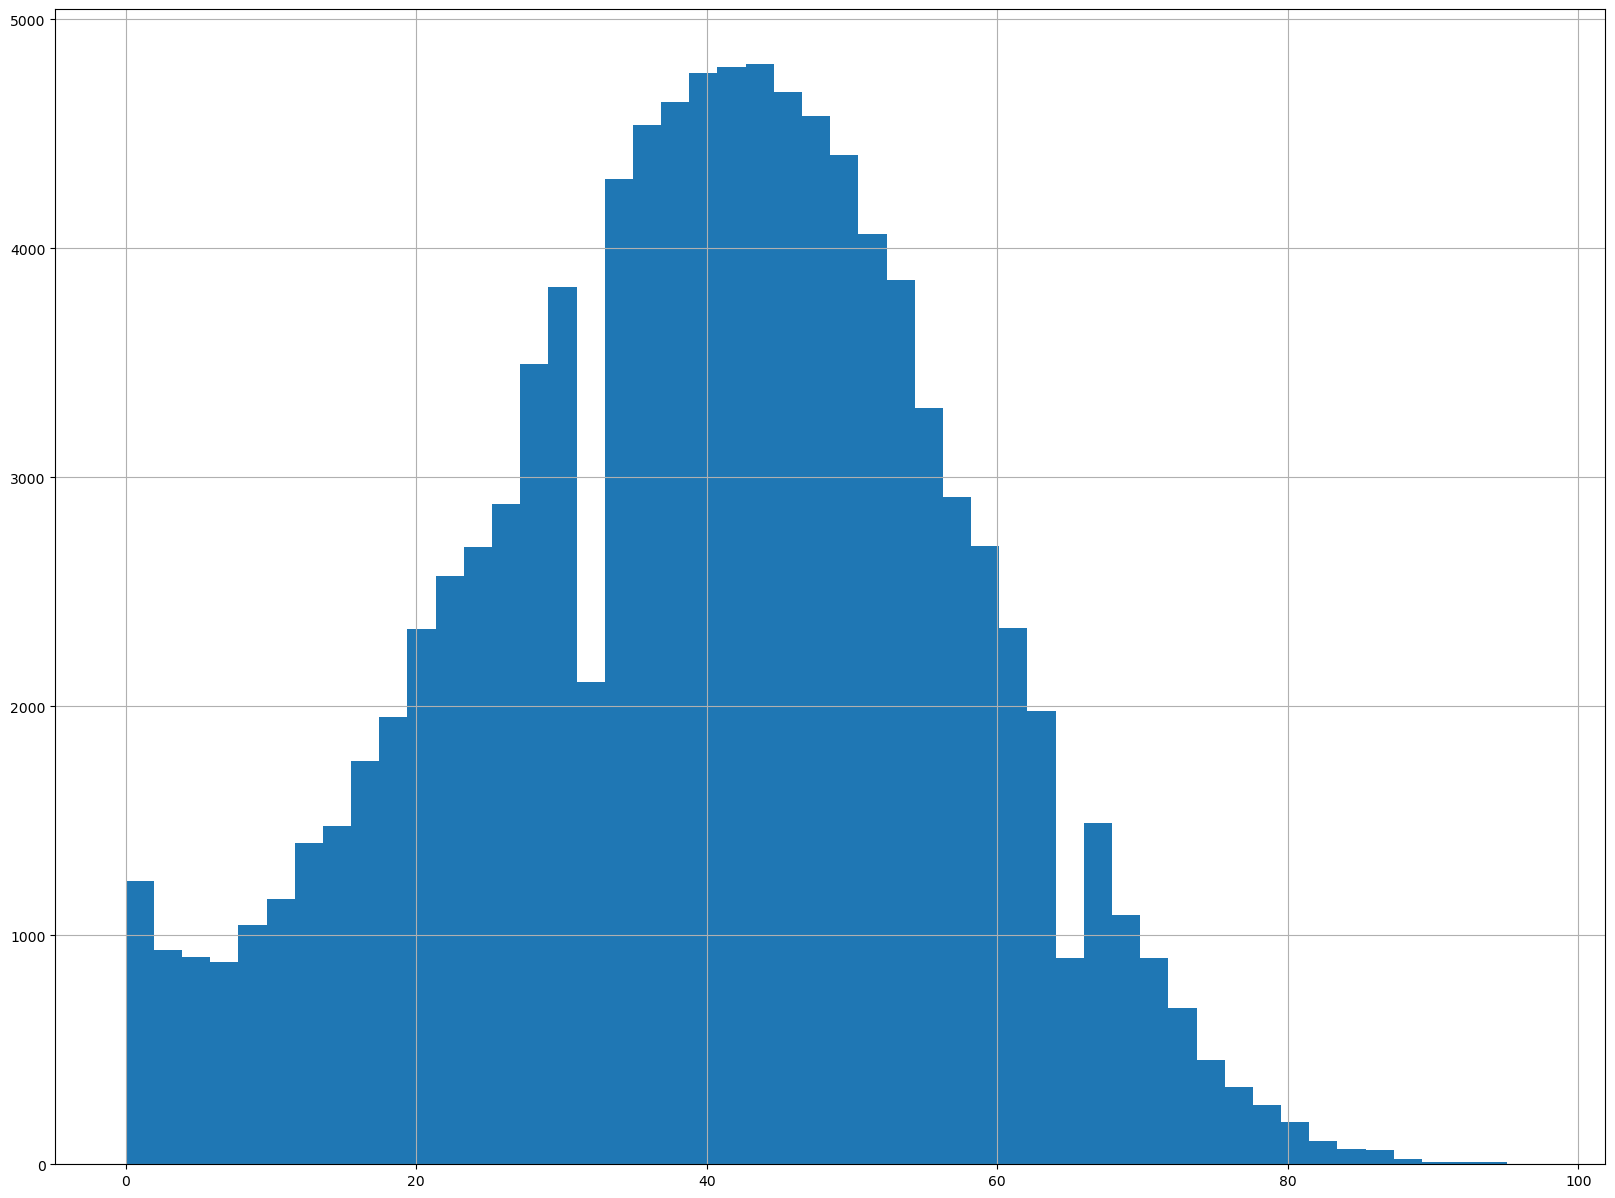

In [35]:
import matplotlib.pyplot as plt


tracks["popularity"].hist(bins=50, figsize=(20,15))

plt.show()

In [36]:
tracks.sort_values(by="popularity",ascending=False)["name"][:20]

90024                                       Calma - Remix
101706                                   Sweet but Psycho
100168                            Going Bad (feat. Drake)
100625                                               Talk
94579                                     i'm so tired...
101732                                  MIA (feat. Drake)
94452                                          High Hopes
89186                         Giant (with Rag'n'Bone Man)
100383                                         Adan y Eva
89648                                   Baila Baila Baila
86219                                   Murder On My Mind
91256                                          SICKO MODE
92713                                  Let Me Down Slowly
92734                                           Please Me
93924                  ZEZE (feat. Travis Scott & Offset)
93012                                               a lot
74129                                            Thotiana
90029         

In [34]:
#outliers in label
from scipy.stats import zscore
z_scores = zscore(all_data_sources['popularity'])
potential_outliers = all_data_sources[(z_scores > 3) | (z_scores < -3)]
potential_outliers[["name_track","popularity"]]

,name_track,popularity
74129,Thotiana,93.0
86219,Murder On My Mind,94.0
87065,Who Do You Love (with 5 Seconds of Summer),92.0
88496,Look Back At It,91.0
88504,Swervin (feat. 6ix9ine),92.0
89186,Giant (with Rag'n'Bone Man),95.0
89648,Baila Baila Baila,95.0
90024,Calma - Remix,97.0
90029,Desconocidos,93.0
91115,Te Vi,92.0


## prepro pipeline

#notes for pipeline:
- train model with train data 
- Include categorical columns of track df
- Include hanna’s version of audio features df 
- Drop track id before transforming
- After scaling correlations super low- Imputer strategy for artist_popularity 


In [139]:
all_data.shape

(101939, 126)

In [140]:
all_data.columns

Index(['playlist', 'available_markets_x', 'country', 'album_id',
       'artists_id_track', 'track_id_track', 'time_signature', 'track_number',
       'energy', 'acousticness',
       ...
       'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87',
       'PC88'],
      dtype='object', length=126)

In [141]:
duplicate_columns = all_data.columns[all_data.columns.duplicated()]

In [142]:
duplicate_columns

Index([], dtype='object')

## Dropping columns

In [143]:
drop_all = ["name","track_id_track","track_id_y","artist_id", "track_id_x", "release_date", "id", "album_id", "artists_id","track_id"]  

In [285]:
all_data = all_data.drop(columns=drop_all)

In [286]:
all_data.shape

(101939, 23)

In [287]:
all_data.columns

Index(['time_signature', 'track_number', 'energy', 'acousticness',
       'duration_ms', 'loudness', 'speechiness', 'popularity', 'album_type',
       'available_markets', 'total_tracks', 'track_name_prev_x',
       'artist_popularity', 'followers', 'genres', 'track_name_prev_y', 'type',
       'mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'vocabulary_wealth'],
      dtype='object')

In [158]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [288]:
#define features and labels 
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]

In [289]:
#train test split 
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

In [290]:
train_data.shape

(81551, 23)

In [291]:
train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

popularity             1.000000
artist_popularity      0.646580
followers              0.285169
loudness               0.237553
energy                 0.152519
time_signature         0.119197
sentence_similarity    0.052971
mean_syllables_word    0.040428
n_sentences            0.035517
vocabulary_wealth      0.025098
mean_words_sentence   -0.096957
n_words               -0.098085
total_tracks          -0.129421
track_number          -0.134224
acousticness          -0.153994
duration_ms           -0.164460
speechiness           -0.302021
Name: popularity, dtype: float64

In [292]:
train_data.dtypes

time_signature         float64
track_number           float64
energy                 float64
acousticness           float64
duration_ms            float64
loudness               float64
speechiness            float64
popularity             float64
album_type              object
available_markets       object
total_tracks             int64
track_name_prev_x       object
artist_popularity      float64
followers              float64
genres                  object
track_name_prev_y       object
type                    object
mean_syllables_word    float64
mean_words_sentence    float64
n_sentences            float64
n_words                float64
sentence_similarity    float64
vocabulary_wealth      float64
dtype: object

In [293]:
train_data.columns

Index(['time_signature', 'track_number', 'energy', 'acousticness',
       'duration_ms', 'loudness', 'speechiness', 'popularity', 'album_type',
       'available_markets', 'total_tracks', 'track_name_prev_x',
       'artist_popularity', 'followers', 'genres', 'track_name_prev_y', 'type',
       'mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'vocabulary_wealth'],
      dtype='object')

In [295]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

    
def get_preprocessor(data):
    
    num_attribs = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attribs = data.select_dtypes(include=['object']).columns
    
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=False)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
    
    return full_pipeline

def create_prepared_dataframe(data, preprocessor):
    # Get the transformed column names
    transformed_num_cols = preprocessor.transformers_[0][2].tolist()
    transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

    # Combine the transformed column names
    transformed_cols = transformed_num_cols + transformed_cat_cols

    # Create a DataFrame with the transformed data and column names
    data_prepared = pd.DataFrame(data, columns=transformed_cols)

    return data_prepared

preprocessor = get_preprocessor(train_data)
data_prepared_array = preprocessor.fit_transform(train_data[:500])

# Create a DataFrame with original column names
data_prepared_df = create_prepared_dataframe(data_prepared_array, preprocessor)

In [302]:
data_prepared_df.corr()["popularity"].sort_values(ascending=False)

popularity             1.000000
artist_popularity      0.610101
followers              0.266291
loudness               0.232791
energy                 0.188287
                         ...   
track_number          -0.168538
genres_['guidance']   -0.179179
total_tracks          -0.218432
speechiness           -0.272963
genres_[]             -0.303132
Name: popularity, Length: 622, dtype: float64

In [269]:
preprocessor = get_preprocessor(train_data)

In [270]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [271]:
preprocessor = get_preprocessor(train_data)

data_prepared = preprocessor.fit_transform(train_data[:500])
#for x in data_prepared:
#    print(len(x))
#now 4700 columns

In [272]:
data_prepared.shape

(500, 622)

## Check for correlations with (encoded) features

In [273]:
# Get the original column names
num_attribs = list(all_data.select_dtypes(include=['float64', 'int64']).columns)
cat_attribs = list(all_data.select_dtypes(include=['object']).columns)

# Get the transformed column names
transformed_num_cols = preprocessor.transformers_[0][2].tolist()
transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

# Create a mapping of transformed column names to original column names
transformed_cols = transformed_num_cols + transformed_cat_cols
orig_cols_expanded = []

for col in all_data.columns:
    if col in cat_attribs:
        one_hot_cols = [t_col for t_col in transformed_cat_cols if t_col.startswith(col + "_")]
        orig_cols_expanded.extend([col] * len(one_hot_cols))
    else:
        orig_cols_expanded.append(col)

col_mapping = dict(zip(transformed_cols, orig_cols_expanded))

# Create the correlation matrix
corr_matrix = pd.DataFrame(data_prepared, columns=transformed_cols).corr()

# Rename the columns of the correlation matrix using the original column names
corr_matrix.rename(columns=col_mapping, index=col_mapping, inplace=True)

# Print the correlation matrix
print(corr_matrix)

                     time_signature  track_number    energy  acousticness  \
time_signature             1.000000      0.025870  0.221201     -0.106896   
track_number               0.025870      1.000000 -0.197510      0.164361   
energy                     0.221201     -0.197510  1.000000     -0.684732   
acousticness              -0.106896      0.164361 -0.684732      1.000000   
duration_ms                0.031829     -0.062149 -0.129624      0.104290   
...                             ...           ...       ...           ...   
mean_words_sentence        0.009839     -0.023125 -0.011276     -0.015982   
n_sentences                0.009839     -0.023125  0.049990     -0.046174   
n_words                   -0.045383      0.046509 -0.029985      0.080060   
sentence_similarity        0.045383     -0.046509  0.029985     -0.080060   
vocabulary_wealth         -0.045383      0.046509 -0.029985      0.080060   

                     duration_ms  loudness  speechiness  popularity  \
time

In [274]:
corr_matrix["popularity"].abs().sort_values(ascending=False)[:20]

popularity             1.000000
album_type             0.610101
track_name_prev_y      0.303132
speechiness            0.272963
album_type             0.266291
loudness               0.232791
album_type             0.218432
energy                 0.188287
genres                 0.179179
track_number           0.168538
acousticness           0.165851
duration_ms            0.160368
time_signature         0.155012
available_markets      0.143343
available_markets      0.133801
sentence_similarity    0.130998
track_name_prev_y      0.130998
n_words                0.130998
vocabulary_wealth      0.130998
track_name_prev_x      0.128739
Name: popularity, dtype: float64

In [275]:
# This correlation is super low?? I think the imputing fucked up the correlations, we need to check
corr_matrix.loc['popularity', 'artist_popularity']

0.03380836896383054

In [ ]:
from scipy.stats import pointbiserialr

cat_data = train_data.select_dtypes(include=['object'])

# Calculate point-biserial correlation coefficients for each categorical feature
for col in cat_data.columns:
    # One-hot encode the categorical feature
    one_hot = pd.get_dummies(train_data[col], prefix=col)
    
    # Calculate the point-biserial correlation coefficient for each encoded category
    for one_hot_col in one_hot.columns:
        coef, p_value = pointbiserialr(train_data['popularity'], one_hot[one_hot_col])
        print(f"Point-biserial correlation between {one_hot_col} and popularity: {coef:.4f} (p-value: {p_value:.4f})")